In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


--a: 7662 rows, 4 cols. data types: Country or Area - object;  Year - int64; Value - float64; Value Footnotes - float64

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df = gdp_df[['Country or Area', 'Year', 'Value']]
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

--need to look up how to count distinct year values per country
--33 possible years. how many years/country?


In [50]:
unique_yr = gdp_df['Year'].nunique()

In [7]:
gdp_df['Country'].nunique()

242

In [8]:
gdp_df.groupby('Year')['Country'].nunique()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Country, dtype: int64

In [9]:
print(gdp_df.groupby('Country')['Year'].nunique())

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64


In [10]:
country_count = gdp_df.groupby("Country").filter(lambda x: x.Year.count() == unique_yr)
print(country_count.nunique())

Country            202
Year                33
GDP_Per_Capita    6628
dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. 

starting with creating new df for only 2020

In [11]:
gdp_df_2020 = gdp_df[gdp_df["Year"] == 2020]
gdp_df_2020 = gdp_df_2020.sort_values('GDP_Per_Capita', ascending=True)
gdp_df_2020.head()


,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556


Now using the new df to create histogram:

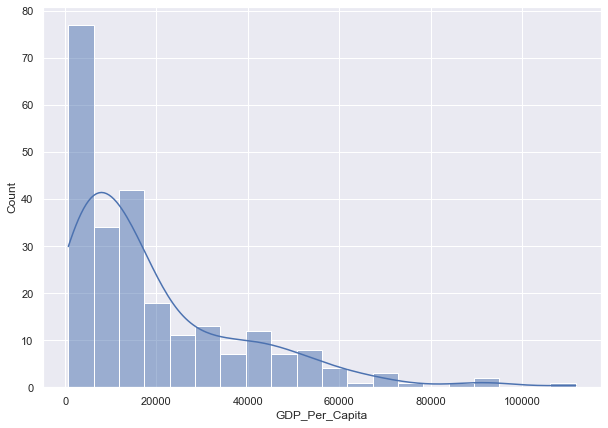

In [12]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))

sns.histplot(data=gdp_df_2020, x="GDP_Per_Capita", kde=True, bins=20)
plt.show()

Using new df to create density plot:

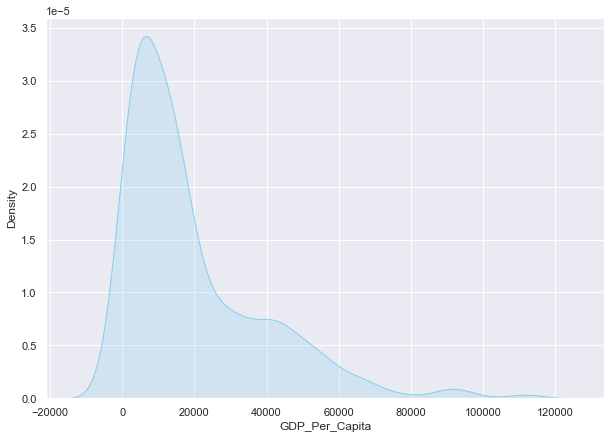

In [13]:
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

plt.figure(figsize=(10, 7))

# Large bandwidth
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], shade=True, bw_method=0.25, color="skyblue")
plt.show()

Using new df to create boxplot:

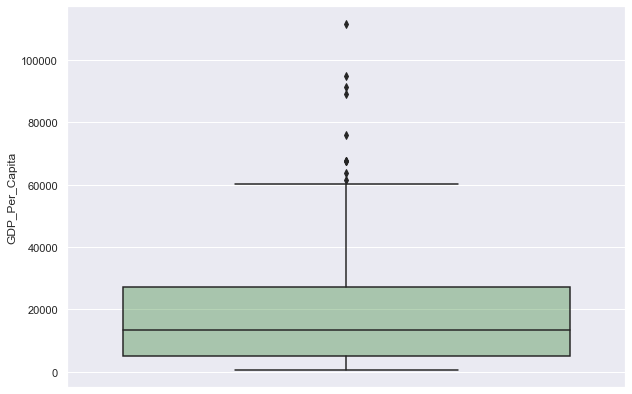

In [14]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))

ax = sns.boxplot(y=gdp_df_2020["GDP_Per_Capita"], color='green')
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))
plt.show()

Using new df to create violin plot:

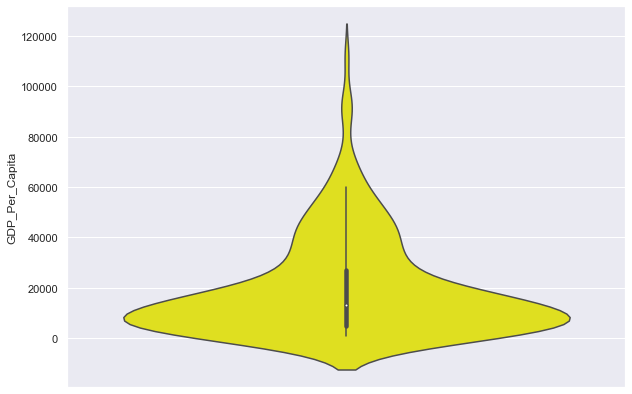

In [15]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))
    
# Make boxplot for one group only
sns.violinplot(y=gdp_df_2020["GDP_Per_Capita"], color='yellow')
plt.show()

What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

I notice that in the density plot and violin plot, I can see that there is data below 0, which I can't tell in the histogram or the boxplot. The histogram shows most clearly that in the values <20000, a large majority of them are in the 5000 bin.

9. What was the median GDP per capita value in 2020?
a: 13357.997573370474


In [16]:
gdp_df_2020['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [17]:
gdp_decades = gdp_df[ (gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020) ]

In [18]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


Using this, create the following 4 plots: A boxplot

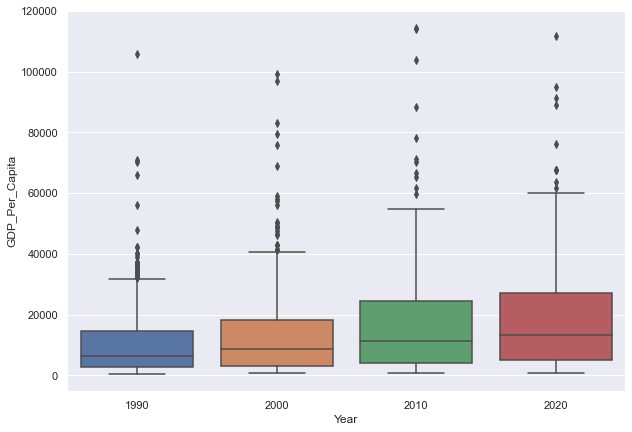

In [19]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))

sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

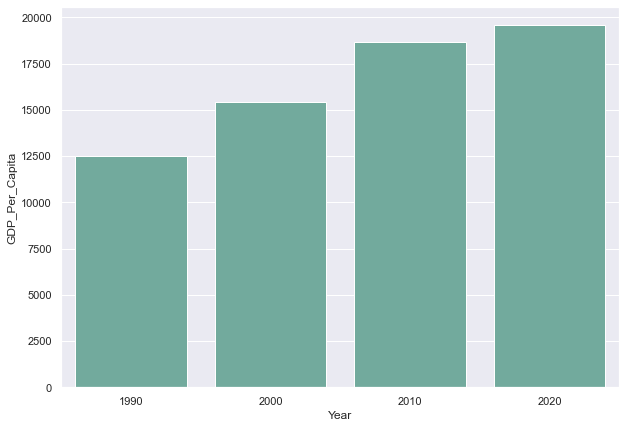

In [20]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x=gdp_decades["Year"], 
    y=gdp_decades['GDP_Per_Capita'], 
    data=gdp_decades, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');

A scatterplot:

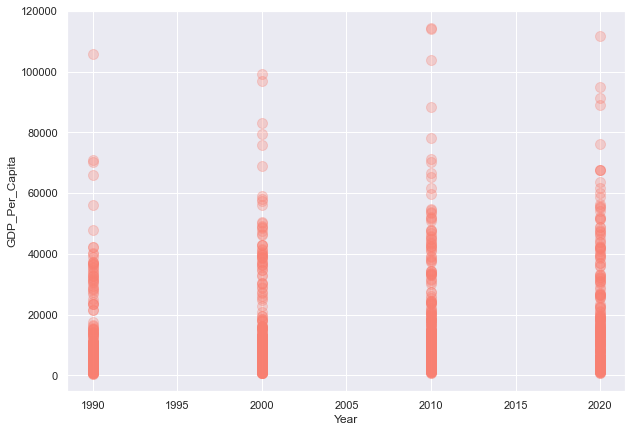

In [21]:
# customize color, transparency and size of the markers
plt.figure(figsize=(10, 7))

sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False, scatter_kws={"color":"salmon","alpha":0.3,"s":100} )

plt.show()

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

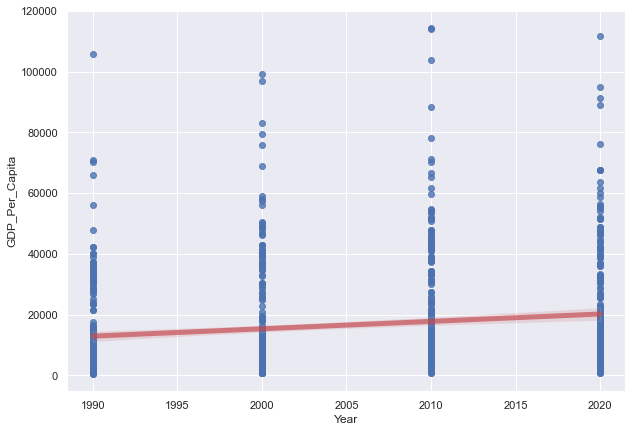

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#df = sns.load_dataset('iris')

plt.figure(figsize=(10, 7))

# plot
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In general, the global GDP has grown over time. The boxplot and scatter plots illustrate the movement in the very top outliers and how very far above the median they are. The bar plot best illustrates the overall trend. I like the boxplot best because i can see the outliers as well as a better understanding of where the average lies.

11. Which country was the first to have a GDP per capita greater than $100,000?
--a: Ireland 1990

In [23]:
gdp_df[gdp_df['GDP_Per_Capita'] > 100000].min()

Country                 Ireland
Year                       1990
GDP_Per_Capita    100956.706467
dtype: object

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

--a: Luxembourg. Did descending sort, created df solely on Lux, and a line plot from that. How to size line plot?

In [24]:
gdp_df_2020 = gdp_df_2020.sort_values('GDP_Per_Capita', ascending=False)
gdp_df_2020.head()

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744


In [25]:
gdp_lux = gdp_df[gdp_df['Country'] == 'Luxembourg']
gdp_lux.head()

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558


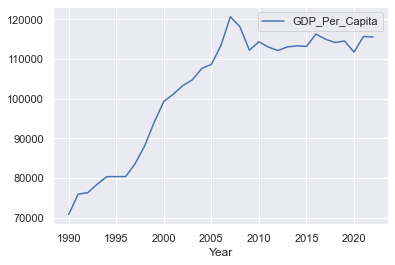

In [26]:
gdp_lux.plot(x='Year',
               y='GDP_Per_Capita',
               kind='line', # (facultative) Default argument
               grid=True, # Add a grid in the background
            )

plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

--a: Burundi. Did ascending sort, created Burundi only df, and made line plot from it.
--**Bonus Question** ??

In [27]:
gdp_df_2020 = gdp_df_2020.sort_values('GDP_Per_Capita', ascending=True)
gdp_df_2020.head()

gdp_bur = gdp_df[gdp_df['Country'] == 'Burundi']
gdp_bur.head()

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223


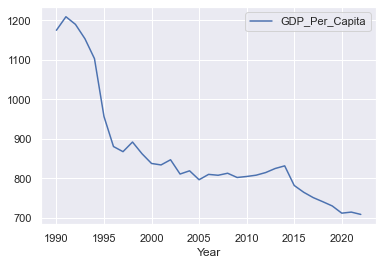

In [28]:
gdp_bur.plot(x='Year',
               y='GDP_Per_Capita',
               kind='line', # (facultative) Default argument
               grid=True, # Add a grid in the background
            )

plt.show()

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

int_df = pd.read_csv('../data/internet_use.csv')
ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6

nrows allowed the import and used tail to see the 6 cols. changed the number of nrows using tail until I could see only 4 expected cols
used info to see datatypes

In [41]:
int_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
#int_df.tail(50)
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [40]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [44]:
int_df = int_df[['Country or Area', 'Year', 'Value']]

int_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [46]:
int_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
int_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


16. Look at the number of observations in this dataset per year. What do you notice?
--a: 1990-1995 is super weird. It goes from 210, to 39, then back up to 138 in 1995


In [52]:
int_df.groupby(['Year']).nunique()

,Country,Internet_Users_Pct
Year,,
1960,7,1
1965,7,1
1970,7,1
1975,7,1
1976,7,1
1977,7,1
1978,7,1
1979,7,1
1980,7,1


17. What is the first year to have a non-zero internet users percentage value?

In [ ]:
17. What is the first year to have a non-zero internet users percentage value

In [54]:
int_df[int_df['Internet_Users_Pct'] > 0]

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
